In [4]:
%load_ext autoreload
%autoreload 2
%cd "~/deepshape/deepshape"

/home/jorgen/deepshape/deepshape


In [5]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [6]:
from curves import *
from layers import *
from palais_layer import *
from visual import *
from networks import *

In [7]:
savepath = "/home/jorgen/masters-thesis-shape-analysis/chapter04/figures/deep/same-shape/"

g = Diffeomorphism(
    lambda x: (0.5 * torch.log(20*x+1) / torch.log(21*torch.ones(1)) 
    + 0.25 * (1 + torch.tanh(20*(x-0.5)) / torch.tanh(21*torch.ones(1))))
)

c1 = Curve((
    lambda x: torch.cos(2*pi*x),
    lambda x: torch.sin(4*pi*x)
))

c2 = c1.compose(g)


# Take Qmaps
q, r = Qmap(c2), Qmap(c1)

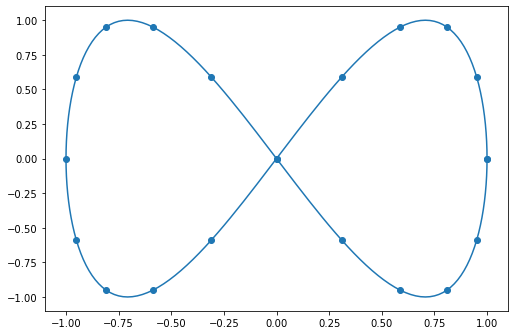

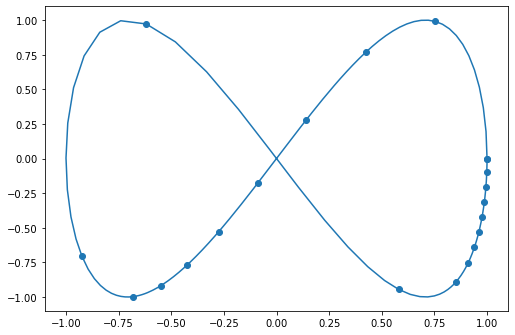

In [8]:
plt.figure(figsize=(8.3, 5.6))
plot_curve(c1, dotpoints=21, ax=plt.gca())
plt.savefig(savepath + "curve.pdf")

plt.figure(figsize=(8.3, 5.6))
plot_curve(c2, dotpoints=21, ax=plt.gca())
plt.savefig(savepath + "curve_reparam.pdf")


In [11]:
# Build network of L layers with N_l basis functions per layer
RN = ReparametrizationNetwork1D(1, 4, init_scale=0.)# , layer_type=TangentReluLayer1D)

# Choose and configure optimizer.
optimizer = optim.LBFGS(RN.parameters(), lr=1e0, max_iter=10, line_search_fn='strong_wolfe')
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=2, threshold=0.,
    threshold_mode='rel', cooldown=10, min_lr=1e-6, eps=1e-08,
    verbose=True)

scheduler=None
error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=10, log_every=1)

# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

[Iter     1] loss: 9.44122
[Iter     2] loss: 6.41613
[Iter     3] loss: 6.01119
[Iter     4] loss: 6.02678
[Iter     5] loss: 6.02694
[Iter     6] loss: 6.02677
[Iter     7] loss: 6.02681
[Iter     8] loss: 6.02681
[Iter     9] loss: 6.02679
[Iter    10] loss: 6.02677
[Iter    11] loss: 9.92623
[Iter    12] loss: 9.92519
[Iter    13] loss: 9.92583
[Iter    14] loss: 9.92553
[Iter    15] loss: 9.92539
[Iter    16] loss: 9.92527
[Iter    17] loss: 9.92528
[Iter    18] loss: 9.92520
[Iter    19] loss: 9.92531
[Iter    20] loss: 9.92531
[Iter    21] loss: 9.92530
[Iter    22] loss: 9.92525
[Iter    23] loss: 9.92522
[Iter    24] loss: 9.92521
[Iter    25] loss: 9.92520
[Iter    26] loss: 9.92520
[Iter    27] loss: 9.92520
[Iter    28] loss: 9.92522
[Iter    29] loss: 9.92520
[Iter    30] loss: 9.92520
[Iter    31] loss: 9.92520
[Iter    32] loss: 9.92522

Finished training in 0.11842s


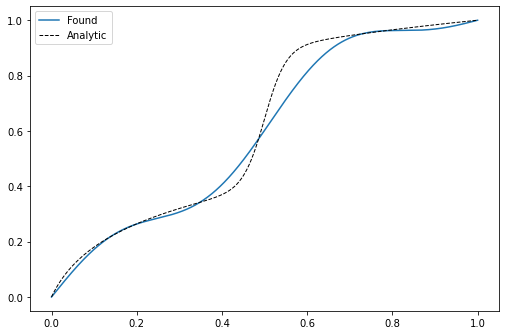

In [10]:
# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# Plot Diffeomorphism...
plt.figure(figsize=(8.4, 5.6))
plt.plot(x, z, label="Found", lw=1.5)
plt.plot(x, g(x), label="Analytic", ls="--", c="black", lw=1)


# plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()
plt.savefig(savepath + "")
plt.show()

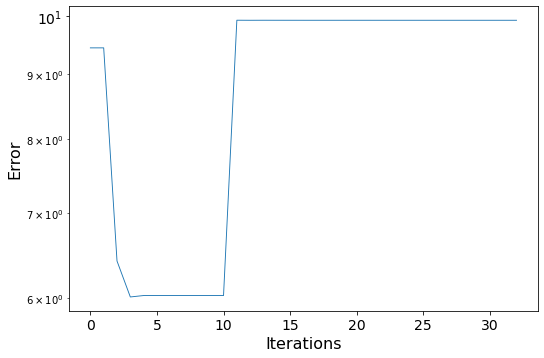

Errors, 1-norm, 2-norm and inf-norm
tensor(413.3849)
tensor(621.8757)
tensor(1438.2759)


In [12]:
# Plot Error
plt.figure(figsize=(8.4, 5.6))
plt.semilogy(error, lw=0.9)
plt.ylabel("Error", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
# plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(savepath + "log-error.pdf")
plt.show()

print("Errors, 1-norm, 2-norm and inf-norm")
print((g(x) - z).norm(1)/ 1024.)
print((g(x) - z).norm(2)/ np.sqrt(1024))
print((g(x) - z).norm(float(np.inf)))

In [3]:
# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
C1, C2, C3 = c1(x), c2(x), c1(z)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C1[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C1[:, 1])

plt.savefig(savepath + "coordinates-before.pdf")
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C3[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C3[:, 1])

plt.savefig(savepath + "coordinates-before.pdf")
plt.show()

NameError: name 'torch' is not defined

[Iter     1] loss: 9.44122
[Iter     2] loss: 6.80850
[Iter     3] loss: 6.72774
[Iter     4] loss: 6.56571
[Iter     5] loss: 6.26590
[Iter     6] loss: 5.66988
[Iter     7] loss: 5.47212
[Iter     8] loss: 5.41462
[Iter     9] loss: 5.16324
[Iter    10] loss: 4.98214
[Iter    11] loss: 4.83981
[Iter    12] loss: 4.68217
[Iter    13] loss: 4.46332
[Iter    14] loss: 4.05618
[Iter    15] loss: 3.75855
[Iter    16] loss: 3.66668
[Iter    17] loss: 3.59537
[Iter    18] loss: 3.52248
[Iter    19] loss: 3.44854
[Iter    20] loss: 3.33445
[Iter    21] loss: 3.20445
[Iter    22] loss: 3.09909
[Iter    23] loss: 3.01755
[Iter    24] loss: 2.95063
[Iter    25] loss: 2.89956
[Iter    26] loss: 2.85797
[Iter    27] loss: 2.82778
[Iter    28] loss: 2.80158
[Iter    29] loss: 2.78368
[Iter    30] loss: 2.76737
[Iter    31] loss: 2.75688
[Iter    32] loss: 2.74762
[Iter    33] loss: 2.74200
[Iter    34] loss: 2.73798
[Iter    35] loss: 2.73649
[Iter    36] loss: 2.73700
Epoch    37: reducing learni

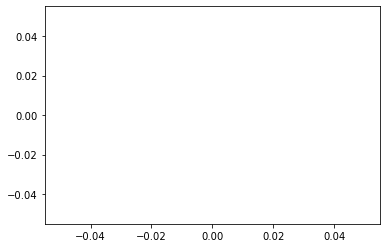

In [28]:
log_error = []
for l in range(1, 2):
    # Build network of L layers with N_l basis functions per layer
    RN = ReparametrizationNetwork1D(l, 5, init_scale=0., Pal)
    
    optimizer = optim.LBFGS(RN.parameters(), lr=1e-1, max_iter=20)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=1, threshold=0.,
        threshold_mode='rel', cooldown=1, min_lr=1e-6, eps=1e-08,
        verbose=True)
    
    error = train_bfgs(q, r, RN, optimizer, scheduler=scheduler, iterations=5, log_every=1.)
    print(error[-1])
    log_error.append(error[-1])
    
plt.plot(log_error)

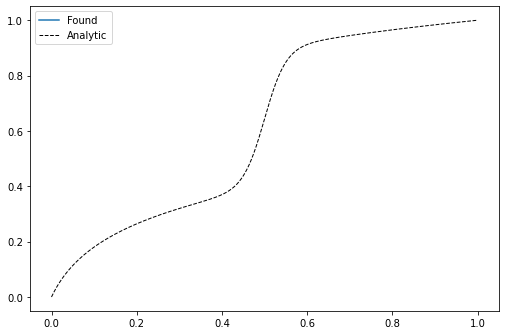

In [26]:
# Plot Diffeomorphism...
plt.figure(figsize=(8.4, 5.6))
plt.plot(x, z, label="Found", lw=1.5)
plt.plot(x, g(x), label="Analytic", ls="--", c="black", lw=1)


# plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()
plt.show()

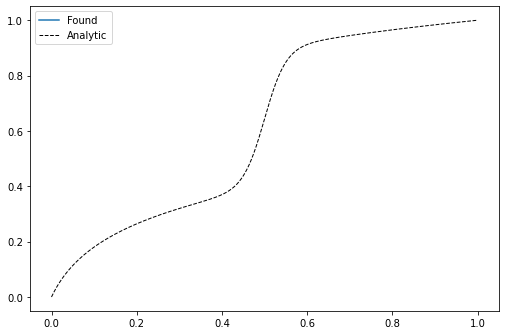

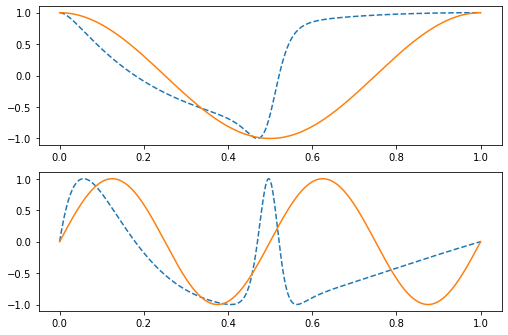

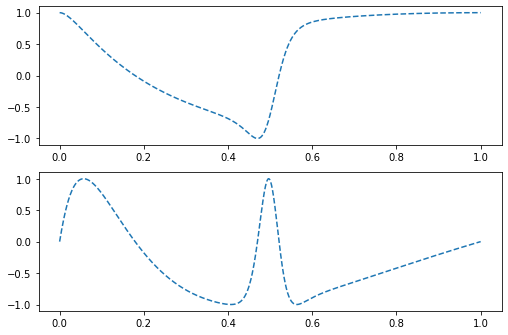

In [21]:
# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
z, y = RN(x)
z, y = z.detach(), y.detach()
Q, R = q(x), RN.reparametrized(r, x)
R = R.detach()

# Plot Diffeomorphism...
plt.figure(figsize=(8.4, 5.6))
plt.plot(x, z, label="Found", lw=1.5)
plt.plot(x, g(x), label="Analytic", ls="--", c="black", lw=1)


# plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()
plt.show()

# Create Plotting Data to verify reparametrizations
x = torch.linspace(0, 1, 1024).unsqueeze(-1)
C1, C2, C3 = c1(x), c2(x), c1(z)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C1[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C1[:, 1])

plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C3[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C3[:, 1])

plt.show()

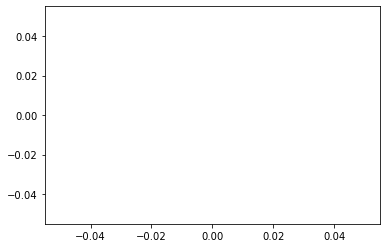

In [23]:
plt.plot(log_error)